In [1]:
%autosave 0

Autosave disabled


In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 目标函数
def real_func(x):
    return np.sin(2 * np.pi * x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [4]:
# 10个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0,0.1) + y1 for y1 in y_]

In [7]:
def fitting(M=0):
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x,y))
    print('Fitting Parameters: ', p_lsq[0])
    
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters:  [-0.0255113]


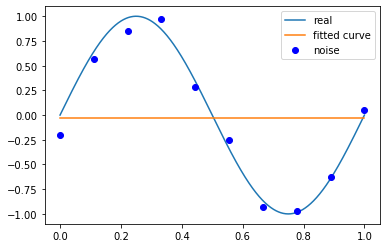

In [8]:
p_lsq_0 = fitting(M=0)

Fitting Parameters:  [-1.17189287  0.56043514]


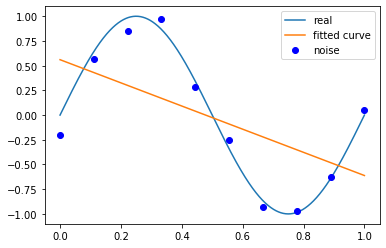

In [9]:
p_lsq_1 = fitting(M=1)

Fitting Parameters:  [ 22.14342978 -33.57168672  11.78726788  -0.25783781]


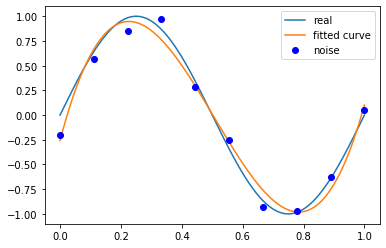

In [10]:
p_lsq_3 = fitting(M=3)

Fitting Parameters:  [ 4.06727503e+04 -1.84591624e+05  3.52523134e+05 -3.68062299e+05
  2.28206800e+05 -8.52180875e+04  1.84725121e+04 -2.10316668e+03
  1.00227033e+02 -1.98225075e-01]


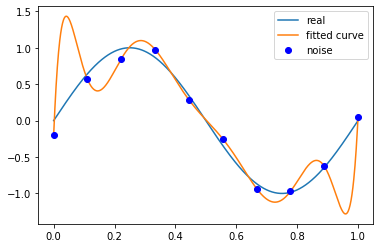

In [11]:
p_lsq_9 = fitting(M=9)

In [12]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                   np.sqrt(0.5 * regularization * np.square(p)))
    return ret

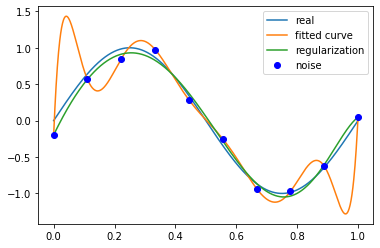

In [14]:
# 最小二乘法，加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization,
                              p_init,
                              args=(x,y))
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()